<a href="https://colab.research.google.com/github/shirin6767saleh/code-/blob/Fnew/Copy_of_F_4meven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let $F$ denote a discrete Fourier

*   List item
*   List item

Let \( F \) be the discrete Fourier transform (DFT) operator, which satisfies the following algebraic properties:

\begin{align*}
F^2 &= 1\oplus J_{n-1}, \\
F^4 &= I,
\end{align*}

where:

-  $J$ is the antidiagonal matrix,
-  $I$ is the identity matrix of appropriate dimension.

In [20]:
import numpy as np
from numpy.linalg import norm
from scipy.linalg import block_diag

# === Parameters ===
m = 50
N = 4 * m
pi = np.pi
w = np.exp(-2j * pi / N)

# === Construct Identity and Symmetry Matrix ===
I = np.eye(N)
J_N = np.fliplr(np.eye(N, dtype=int))  # Reflection operator
J_N_1 = np.fliplr(np.eye(N - 1, dtype=int))
direct_sum_matrix = block_diag(1, J_N_1)
# === Construct  Matrix ّ ===
F = np.zeros((N, N), dtype=complex)
for k in range(N):
    F[k] = np.sqrt(1 / N) * np.array([
        w ** ((k ) * (l )) for l in range(N)
    ])

# === Matrix Powers ===
F2 = np.linalg.matrix_power(F, 2)
F4 = np.linalg.matrix_power(F, 4)
F3 = np.linalg.matrix_power(F,3)
F_H = np.conj(F).T
# === Identity Verification ===
print("\n--- Algebraic Identity Checks ---")

if np.allclose(F2, direct_sum_matrix, atol=1e-10):
    print("✅ F² = direct_sum_matrix")
else:
    print("❌ F² ≠ direct_sum_matrix")

if np.allclose(F3, F_H, atol=1e-10):
    print("✅ F³ = F_H confirmed")
else:
    print("❌ F³ ≠ F_H")

if np.allclose(F4, I, atol=1e-10):
    print("✅ F⁴ = I confirmed")
else:
    print("❌ F⁴ ≠ I")

print("----------------------------------\n")




--- Algebraic Identity Checks ---
✅ F² = direct_sum_matrix
✅ F³ = F_H confirmed
✅ F⁴ = I confirmed
----------------------------------



In [21]:
FDCT = np.zeros_like(F)
FDST = np.zeros_like(F)

# === Construct FDCT and FDST ===
for k in range(N):
    FDCT[k] = (2 / np.sqrt(N)) * np.array([
        np.cos((k * l * 2 * np.pi) / N) for l in range(N)
    ])
    FDST[k] = (2 / np.sqrt(N)) * np.array([
        np.sin((k * l * 2 * np.pi) / N) for l in range(N)
    ])
# === Check the connection between FDCT and F ===

print("\n--- FDCT Connection Analysis ---")
if np.allclose(FDCT, F3 + F, atol=1e-10):
    print("✅ FDCT = F3 + F confirmed")
else:
    print("❌ FDCT ≠ F3 + F")

# === Part 1: FDCT Squared Identity ===
Square_FDCT = FDCT @ FDCT

print("\n--- FDCT Analysis ---")
if np.allclose(Square_FDCT, 2 * (I + F2), atol=1e-10):
    print("✅ FDCT² = 2·(I + F2) confirmed")
else:
    print("❌ FDCT² ≠ 2·(I + F2)")

# Eigenvalue spectrum of FDCT
eigvals_FDCT = np.unique(np.round(np.linalg.eigvals(FDCT), decimals=5))
print(f"Eigenvalues of FDCT: {eigvals_FDCT}")
print("*" * 40)


# === Check the connection between FDST and F ===

print("\n--- FDST Connection Analysis ---")
if np.allclose(FDST, 1j * (F - F3), atol=1e-10):
    print("✅ FDST = 1j * (F - F3) confirmed")
else:
    print("❌ FDST ≠ 1j * (F - F3)")


# === Part 2: FDST Squared Identity ===
Square_FDST = FDST @ FDST

print("\n--- FDST Analysis ---")
if np.allclose(Square_FDST, 2 * (I - F2), atol=1e-10):
    print("✅ FDST² = 2·(I - F2) confirmed")
else:
    print("❌ FDST² ≠ 2·(I + F2)")

# Eigenvalue spectrum of FDST
eigvals_FDST = np.unique(np.round(np.linalg.eigvals(FDST), decimals=5))
print(f"Eigenvalues of FDST: {eigvals_FDST}")
print("*" * 40)





--- FDCT Connection Analysis ---
✅ FDCT = F3 + F confirmed

--- FDCT Analysis ---
✅ FDCT² = 2·(I + F2) confirmed
Eigenvalues of FDCT: [-2.+0.j -0.-0.j  2.-0.j]
****************************************

--- FDST Connection Analysis ---
✅ FDST = 1j * (F - F3) confirmed

--- FDST Analysis ---
✅ FDST² = 2·(I - F2) confirmed
Eigenvalues of FDST: [-2.-0.j -0.+0.j  2.+0.j]
****************************************


In [22]:
# === Verify algebraic decomposition of F ===
check1 = np.round(F3 + F - FDCT, 2)
check2 = np.round((1j * (F - F3)) - FDST, 2)

zero_matrix = np.zeros_like(F)
print("\n--- Decomposition Verification ---")
if np.allclose(check1, zero_matrix) and np.allclose(check2, zero_matrix):
    print("✅ F3 + F = FDCT and 1j * (F - F3) = FDST confirmed")
else:
    print("❌ Decomposition mismatch detected")
print("----------------------------------")

# === Construct eigenspace components ===
Eig_pos1 = (I + direct_sum_matrix) + FDCT       # eigval +1
Eig_neg1 = (I + direct_sum_matrix) - FDCT       # eigval -1
Eig_posi = (I - direct_sum_matrix) - FDST       # eigval +i
Eig_negi = (I - direct_sum_matrix) + FDST       # eigval -i

# === Verify eigenvalue equations Fv = λv ===
print("\n--- Eigenvalue Verification ---")
def check_eigvec(eig_matrix, expected, label):
    if np.allclose(F @ eig_matrix, expected * eig_matrix, atol=1e-2):
        print(f"✅ EigVecs confirmed for eigenvalue {label}")
    else:
        print(f"❌ EigVecs failed for eigenvalue {label}")

check_eigvec(Eig_pos1,  1,   "+1")
check_eigvec(Eig_neg1, -1,   "-1")
check_eigvec(Eig_posi,  1j,  "+i")
check_eigvec(Eig_negi, -1j,  "-i")
print("----------------------------------")

# === Construct normalized projection matrices ===
Proj_pos1 = (1/4) * Eig_pos1
Proj_neg1 = (1/4) * Eig_neg1
Proj_posi = (1/4) * Eig_posi
Proj_negi = (1/4) * Eig_negi

# === Check idempotence: P^2 = P ===
print("\n--- Idempotence Checks for Projectors ---")
def check_idempotent(P, label):
    if np.allclose(P @ P, P, atol=1e-2):
        print(f"✅ Proj_{{{label}}} is idempotent")
    else:
        print(f"❌ Proj_{{{label}}} is not idempotent")

check_idempotent(Proj_pos1, "+1")
check_idempotent(Proj_neg1, "-1")
check_idempotent(Proj_posi, "+i")
check_idempotent(Proj_negi, "-i")
print("------------------------------------------\n")

# === Final identity decomposition check ===
identity_operator = Proj_pos1 + Proj_neg1 + Proj_posi + Proj_negi

print("\n--- Identity Decomposition Check ---")
if np.allclose(np.eye(N), identity_operator, atol=1e-2):
    print("✅ I = Proj_{+1} + Proj_{-1} + Proj_{+i} + Proj_{-i} confirmed")
else:
    print("❌ Identity cannot be decomposed into spectral projections")
print("------------------------------------------")



--- Decomposition Verification ---
✅ F3 + F = FDCT and 1j * (F - F3) = FDST confirmed
----------------------------------

--- Eigenvalue Verification ---
✅ EigVecs confirmed for eigenvalue +1
✅ EigVecs confirmed for eigenvalue -1
✅ EigVecs confirmed for eigenvalue +i
✅ EigVecs confirmed for eigenvalue -i
----------------------------------

--- Idempotence Checks for Projectors ---
✅ Proj_{+1} is idempotent
✅ Proj_{-1} is idempotent
✅ Proj_{+i} is idempotent
✅ Proj_{-i} is idempotent
------------------------------------------


--- Identity Decomposition Check ---
✅ I = Proj_{+1} + Proj_{-1} + Proj_{+i} + Proj_{-i} confirmed
------------------------------------------


In [23]:
#==== Selected Columns ====#
patr1_F1 = ((I + direct_sum_matrix) + FDCT) [: , 0: m - 1]
patr2_F1 = ((I + direct_sum_matrix) + FDCT) [: , 2*m][:, np.newaxis]

Eig_F_neg1 = ((I + direct_sum_matrix) - FDCT) [ : , 0: m - 1]

Eig_F_posi = ((I - direct_sum_matrix) - FDST) [: , 1:m-1]

part1_F_negi = ((I - direct_sum_matrix) + FDST) [ : , 1:m-1]
part2_F_negi = ((I - direct_sum_matrix) + FDST) [ : , 2*m-1][:, np.newaxis]
# === merged columns === #
Eig_F1 = np.hstack([patr1_F1, patr2_F1])
Eig_F_negi = np.hstack([part1_F_negi,part2_F_negi])

print("\n\033[94m--- Eigenvector Checks for F ---\033[0m")

# === Check F·v = λ·v for each set ===
if np.allclose(F @ Eig_F1, Eig_F1, atol=1e-2):
    print("✅ Eig_F1 is an eigenbasis of F for λ = +1")
else:
    print("❌ Eig_F1 is not an eigenbasis for λ = +1")

if np.allclose(F @ Eig_F_neg1, -Eig_F_neg1, atol=1e-2):
    print("✅ Eig_F_neg1 is an eigenbasis of F for λ = -1")
else:
    print("❌ Eig_F_neg1 is not an eigenbasis for λ = -1")

if np.allclose(F @ Eig_F_posi, 1j * Eig_F_posi, atol=1e-2):
    print("✅ Eig_F_posi is an eigenbasis of F for λ = +i")
else:
    print("❌ Eig_F_posi is not an eigenbasis for λ = +i")

if np.allclose(F @ Eig_F_negi, -1j * Eig_F_negi, atol=1e-2):
    print("✅ Eig_F_negi is an eigenbasis of F for λ = -i")
else:
    print("❌ Eig_F_negi is not an eigenbasis for λ = -i")

print("\033[90m" + "-"*45 + "\033[0m")





--- Eigenvector Checks for F ---
✅ Eig_F1 is an eigenbasis of F for λ = +1
✅ Eig_F_neg1 is an eigenbasis of F for λ = -1
✅ Eig_F_posi is an eigenbasis of F for λ = +i
✅ Eig_F_negi is an eigenbasis of F for λ = -i
---------------------------------------------


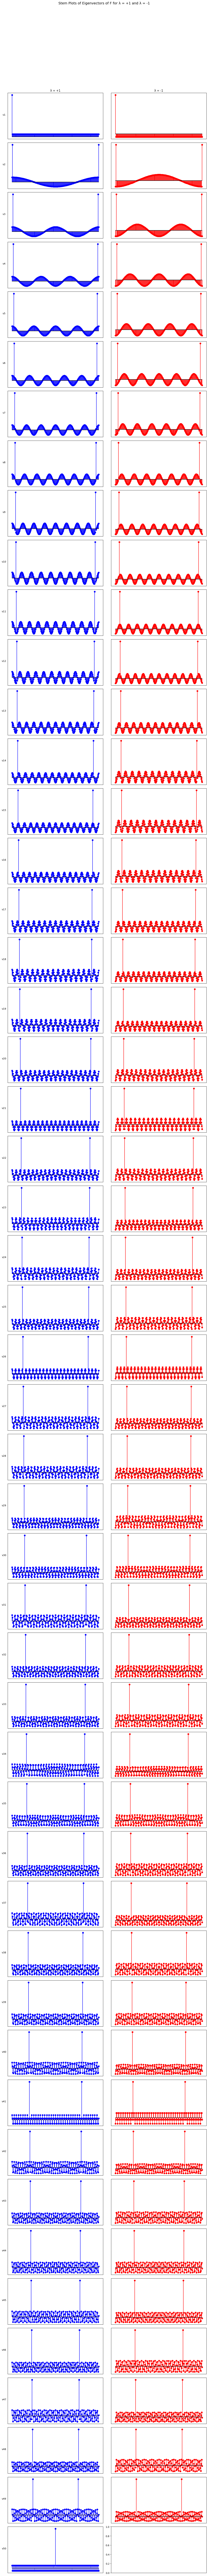

In [24]:
import matplotlib.pyplot as plt

# Get the number of eigenvectors for λ=+1 and λ=-1
num_vectors_pos1 = Eig_F1.shape[1]
num_vectors_neg1 = Eig_F_neg1.shape[1]

# Create the x-axis values based on the size of each eigenvector
x = np.arange(Eig_F1.shape[0])

# Determine the maximum number of eigenvectors to set the number of rows
max_rows = max(num_vectors_pos1, num_vectors_neg1)

# Create subplots with max_rows rows and 2 columns
fig, axs = plt.subplots(nrows=max_rows, ncols=2, figsize=(12, 3 * max_rows), sharex=True)

# Set a main title for the entire plot
fig.suptitle("Stem Plots of Eigenvectors of F for λ = +1 and λ = -1", fontsize=14)

# Loop over the eigenvectors for λ=+1 and plot them
for i in range(num_vectors_pos1):
    axs[i, 0].stem(x, np.real(Eig_F1[:, i]), linefmt='b-', markerfmt='bo', basefmt='k-')
    axs[i, 0].set_ylabel(f"v{i+1}", rotation=0, labelpad=15)  # y-axis label for each
    axs[i, 0].set_xticks([])  # Remove x-axis ticks for clarity
    axs[i, 0].set_yticks([])  # Remove y-axis ticks for clarity
    axs[i, 0].grid(True)  # Enable grid for better visualization

# Loop over the eigenvectors for λ=-1 and plot them
for i in range(num_vectors_neg1):
    axs[i, 1].stem(x, np.real(Eig_F_neg1[:, i]), linefmt='r-', markerfmt='ro', basefmt='k-')
    axs[i, 1].set_xticks([])  # Remove x-axis ticks
    axs[i, 1].set_yticks([])  # Remove y-axis ticks
    axs[i, 1].grid(True)  # Enable grid

# Set titles for the top row of each column if vectors exist
if num_vectors_pos1 > 0:
    axs[0, 0].set_title("λ = +1", fontsize=12)
if num_vectors_neg1 > 0:
    axs[0, 1].set_title("λ = -1", fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

# Block Forms of FDCT and FDST for Even-Length Signals
# The Square of FDCT and FDST
# Eigvals of FDCT and FDST
# Even Case

In [25]:
## ===parameter===#
mid = N // 2
#Construct Identity and Symmetry Matrix
I = np.eye(2 * m - 1)
J = np.eye(2*m - 1)
J = J[:, ::-1]
#== zeros matrix===#
Z1 = np.zeros((1, 2 * m - 1))
Z2 = np.zeros((2 * m - 1, 1))
# === construct C_even  ====#
C_even = np.zeros((2*m - 1, 2*m - 1))
for k in range(1, 2*m):
    for l in range(1, 2*m):
        C_even[k - 1, l - 1] = np.cos((2 * np.pi * k * l) / N)

FDCT = np.zeros((N, N))
for k in range(1, N + 1):
    for l in range(1, N + 1):
        FDCT[k - 1, l - 1] = np.cos((2 * np.pi * (k - 1) * (l - 1)) / N)

# === construct C_even  ====#
S_even = np.zeros((2*m - 1, 2*m - 1))
for k in range(1, 2*m):
    for l in range(1, 2*m):
        S_even[k - 1, l - 1] = (2 / np.sqrt(N)) * np.sin((2 * np.pi * k * l) / N)

FDST = np.zeros((N, N))
for k in range(1, N + 1):
    for l in range(1, N + 1):
        FDST[k - 1, l - 1] = (2 / np.sqrt(N)) * np.sin((2 * np.pi * (k - 1) * (l - 1)) / N)

#### reconstruct FDST===#
recon_FDST = np.block([
    [0, Z1, 0, Z1],
    [Z2,S_even , Z2, -S_even @ J],
    [0, Z1, 0, Z1],
    [Z2, -J @ S_even, Z2, J @ S_even @ J]
])

#### reconstruct FDCT===#
recon_FDCT = np.zeros((N, N))
recon_FDCT[0, :] = 1
recon_FDCT[:, 0] = 1
recon_FDCT[mid, :] = (-1) ** np.arange(N)
recon_FDCT[:, mid] = (-1) ** np.arange(N)

recon_FDCT[1:mid, 1:mid] = C_even
recon_FDCT[1:mid, mid+1:N] = C_even @ J
recon_FDCT[mid+1:N, 1:mid] = J @ C_even
recon_FDCT[mid+1:N, mid+1:N] = J @ C_even @ J


# === Validate ===
print("FDCT shape:", FDCT.shape, "| C_even shape:", C_even.shape)
print("FDCT ≈ reconstructed FDCT?")
print("Comparison result:", np.allclose(FDCT, recon_FDCT, atol=1e-10))
print("*" * 40)

print("C_even =\n", C_even)


print("FDST shape:", FDST.shape, "| S_even shape:", S_even.shape)
print("FDST ≈ reconstructed FDST?")
print("Comparison result:", np.allclose(FDST, recon_FDST, atol=1e-10))
print("*" * 40)

print("S_even =\n", S_even)


FDCT shape: (200, 200) | C_even shape: (99, 99)
FDCT ≈ reconstructed FDCT?
Comparison result: True
****************************************
C_even =
 [[ 0.99950656  0.99802673  0.99556196 ... -0.99556196 -0.99802673
  -0.99950656]
 [ 0.99802673  0.9921147   0.98228725 ...  0.98228725  0.9921147
   0.99802673]
 [ 0.99556196  0.98228725  0.96029369 ... -0.96029369 -0.98228725
  -0.99556196]
 ...
 [-0.99556196  0.98228725 -0.96029369 ...  0.96029369 -0.98228725
   0.99556196]
 [-0.99802673  0.9921147  -0.98228725 ... -0.98228725  0.9921147
  -0.99802673]
 [-0.99950656  0.99802673 -0.99556196 ...  0.99556196 -0.99802673
   0.99950656]]
FDST shape: (200, 200) | S_even shape: (99, 99)
FDST ≈ reconstructed FDST?
Comparison result: True
****************************************
S_even =
 [[ 0.00444215  0.00887992  0.01330893 ...  0.01330893  0.00887992
   0.00444215]
 [ 0.00887992  0.0177248   0.02649972 ... -0.02649972 -0.0177248
  -0.00887992]
 [ 0.01330893  0.02649972  0.0394553  ...  0.0394

In [26]:
# === construct zebra_diff_matrix === #
zebra_diff_matrix = np.zeros((m-1, m-1))
np.fill_diagonal(zebra_diff_matrix, (m - 2) / 2)

for i in range(m-1):
    for j in range(m-1):
        if i != j and abs(i - j) % 2 == 0:
            zebra_diff_matrix[i, j] = -1
# === Extract the components for even case ===
C_even = FDCT[1:m, 1:m]
S_even = FDST[1:m, 1:m]
# === Compute squares of C_even and S_even ===
C_even_squared = C_even @ C_even
S_even_squared = S_even @ S_even

print("Is C_even^2 ≈ zebra_diff_matrix?")
print(np.allclose(C_even_squared, zebra_diff_matrix, atol=1e-2))

print("Is S_even @ S_even ≈ I_m?")
print(np.allclose(S_even_squared, np.eye(m - 1), atol=1e-2))
# === Compute eigenvalues ===
eigvals_C_even = np.unique(np.round(np.linalg.eigvals(C_even), 4))
eigvals_S_even = np.unique(np.round(np.linalg.eigvals(S_even), 4))

print("Eigenvalues of C_even (FDCT):")
print(eigvals_C_even)
print("Eigenvalues of S_even (FDST):")
print(eigvals_S_even)
print("*" * 40)

Is C_even^2 ≈ zebra_diff_matrix?
False
Is S_even @ S_even ≈ I_m?
False
Eigenvalues of C_even (FDCT):
[-7.0711e+00+0.j -7.0091e+00+0.j -5.2896e+00+0.j -2.1488e+00+0.j
 -4.3900e-02+0.j -3.0000e-04+0.j -0.0000e+00-0.j  4.1000e-03+0.j
  3.6730e-01+0.j  4.7343e+00+0.j  5.8517e+00+0.j  7.0699e+00+0.j
  7.0711e+00+0.j]
Eigenvalues of S_even (FDST):
[-1.000e+00+0.j -9.523e-01+0.j -1.353e-01+0.j -2.000e-03+0.j
  0.000e+00+0.j  2.000e-04+0.j  1.880e-02+0.j  5.720e-01+0.j
  9.986e-01+0.j  1.000e+00+0.j]
****************************************
